In [1]:
import numpy as np
import matplotlib.pyplot as plt

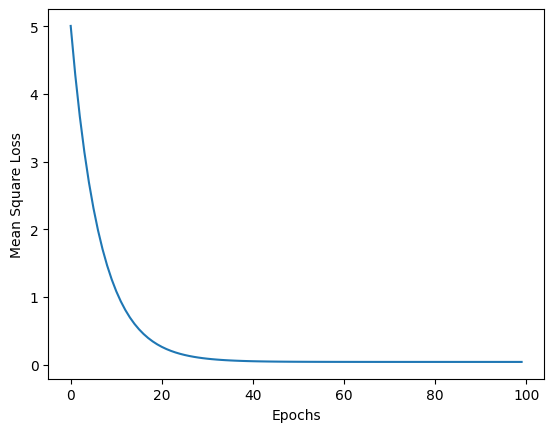

In [2]:
s = 0.5
k = 10
# number of points
n = 100
def f_org(x):
    return (1/(1+np.exp(-10*x**2))) - 0.5

def f_noisy(x):
    return f_org(x) + s*np.random.normal(0, 0.1, n)

x = np.random.uniform(-1, 1, n)
y = f_noisy(x)

class ANN:
    def __init__(self, x, y, epochs = 100, lr = 0.01):
        self.x = x
        self.y = y
        self.w1 = np.random.uniform(-1, 1, k).reshape(k, 1)
        self.w2 = np.random.uniform(-1, 1, k).reshape(1, k)
        self.b1 = np.random.uniform(-1, 1, k)
        self.b2 = np.random.uniform(-1, 1, 1)
        self.epochs = epochs
        self.lr = lr
    
    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def sigmoid_d(self, z):
        return self.sigmoid(z)*(1 - self.sigmoid(z))
    
    def f(self, x):
        return (self.w2@self.sigmoid(np.dot(self.w1, x) + self.b1.reshape(k,1)) + self.b2).reshape(1)
    
    def grad_w1(self, x, y):
        return (2*(self.f(x) - y)*(self.w2.T*np.dot(
                self.sigmoid_d(np.dot(self.w1, x) + self.b1.reshape(k,1)), x
            ))).reshape(k, 1)
    
    def grad_w2(self, x, y):
        return (2*(self.f(x) - y)*(self.sigmoid(np.dot(self.w1, x) + self.b1.reshape(k,1)))).reshape(1, k)
    
    def grad_b1(self, x, y):
        return (2*(self.f(x) - y)*(self.w2.T*(
                self.sigmoid_d(np.dot(self.w1, x) + self.b1.reshape(k,1))
            ))).reshape(k)
    
    def grad_b2(self, x, y):
        return (2*(self.f(x) - y)).reshape(1)
    
    def loss(self, x, y):
        return (self.f(x) - y)**2
    
    def mean_func(self, func):
        res = 0
        for i in range(n):
            res += func(self.x[i], self.y[i])
        return res / n
    
    def fit(self):
        self.history_loss = []
        for epoch in range(self.epochs):
            self.w1 -= self.lr*self.mean_func(self.grad_w1)
            self.w2 -= self.lr*self.mean_func(self.grad_w2)
            self.b1 -= self.lr*self.mean_func(self.grad_b1)
            self.b2 -= self.lr*self.mean_func(self.grad_b2)
            loss = self.mean_func(self.loss)
            self.history_loss.append(loss)
            
    def predict(self, x):
        return self.f(x)


model = ANN(x, y)
model.fit()

plt.plot(model.history_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Loss')
plt.show()


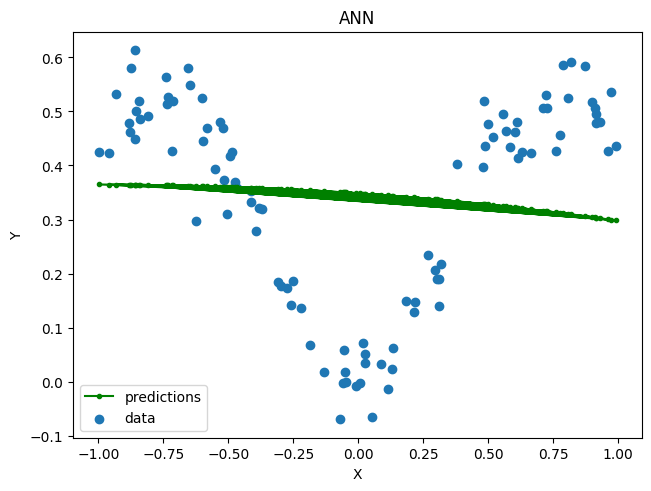

In [3]:
fig, ax = plt.subplots(layout='constrained')
y_predicts = np.array([model.predict(d) for d in x])
# plot
ax.set_title("ANN")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(x, y_predicts, ".-", label='predictions', c='g')
ax.scatter(x, y,  label='data')
ax.legend()
plt.show()
